# LAB | Intro to Machine Learning

**Load the data**

In this challenge, we will be working with Spaceship Titanic data. The data can be found here:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv

Metadata

https://github.com/data-bootcamp-v4/data/blob/main/spaceship_titanic.md

Import Zone

In [22]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [2]:
spaceship = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv")
spaceship.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


**Check the shape of your data**

In [5]:
#your code here
spaceship.shape

(8693, 14)

In [6]:
spaceship.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


**Check for data types**

In [8]:
#your code here
spaceship.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

**Check for missing values**

In [9]:
#your code here
spaceship.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [10]:
spaceship.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

There are multiple strategies to handle missing data

- Removing all rows or all columns containing missing data.
- Filling all missing values with a value (mean in continouos or mode in categorical for example).
- Filling all missing values with an algorithm.

For this exercise, because we have such low amount of null values, we will drop rows containing any missing value. 

In [14]:
#your code here
spaceship_cleaned = spaceship.dropna()
spaceship_cleaned.shape

(6606, 14)

In [16]:
spaceship_cleaned.isna().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

**KNN**

Create a function that test different K values

In [ ]:
def test_k_values(X, y, k_values, cv=5):
    """
    Test different values of K for a K-nearest neighbors classifier using cross-validation.
    
    Parameters:
    - X: Input features (numpy array or pandas DataFrame).
    - y: Target labels (numpy array or pandas Series).
    - k_values: List of K values to test.
    - cv: Number of folds for cross-validation (default is 5).
    
    Returns:
    - Dictionary containing K values as keys and corresponding mean cross-validation scores as values.
    """
    results = {}
    
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(knn, X, y, cv=cv)
        results[k] = scores.mean()
    
    return results


In [ ]:
# Example usage:
# Assuming X and y are your input features and target labels, and k_values is a list of K values to test
# results = test_k_values(X, y, k_values=[3, 5, 7, 9, 11])
# print(results)

K Nearest Neighbors is a distance based algorithm, and requeries all **input data to be numerical.**

Let's only select numerical columns as our features.

In [18]:
#your code here
numerical_cleaned_spaceship = spaceship_cleaned.select_dtypes(include='number')
numerical_cleaned_spaceship.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6606 entries, 0 to 8692
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           6606 non-null   float64
 1   RoomService   6606 non-null   float64
 2   FoodCourt     6606 non-null   float64
 3   ShoppingMall  6606 non-null   float64
 4   Spa           6606 non-null   float64
 5   VRDeck        6606 non-null   float64
dtypes: float64(6)
memory usage: 361.3 KB


And also lets define our target.

In [20]:
#your code here
X = numerical_cleaned_spaceship.drop(columns='Age')
y = numerical_cleaned_spaceship['Age']

Quick EDA

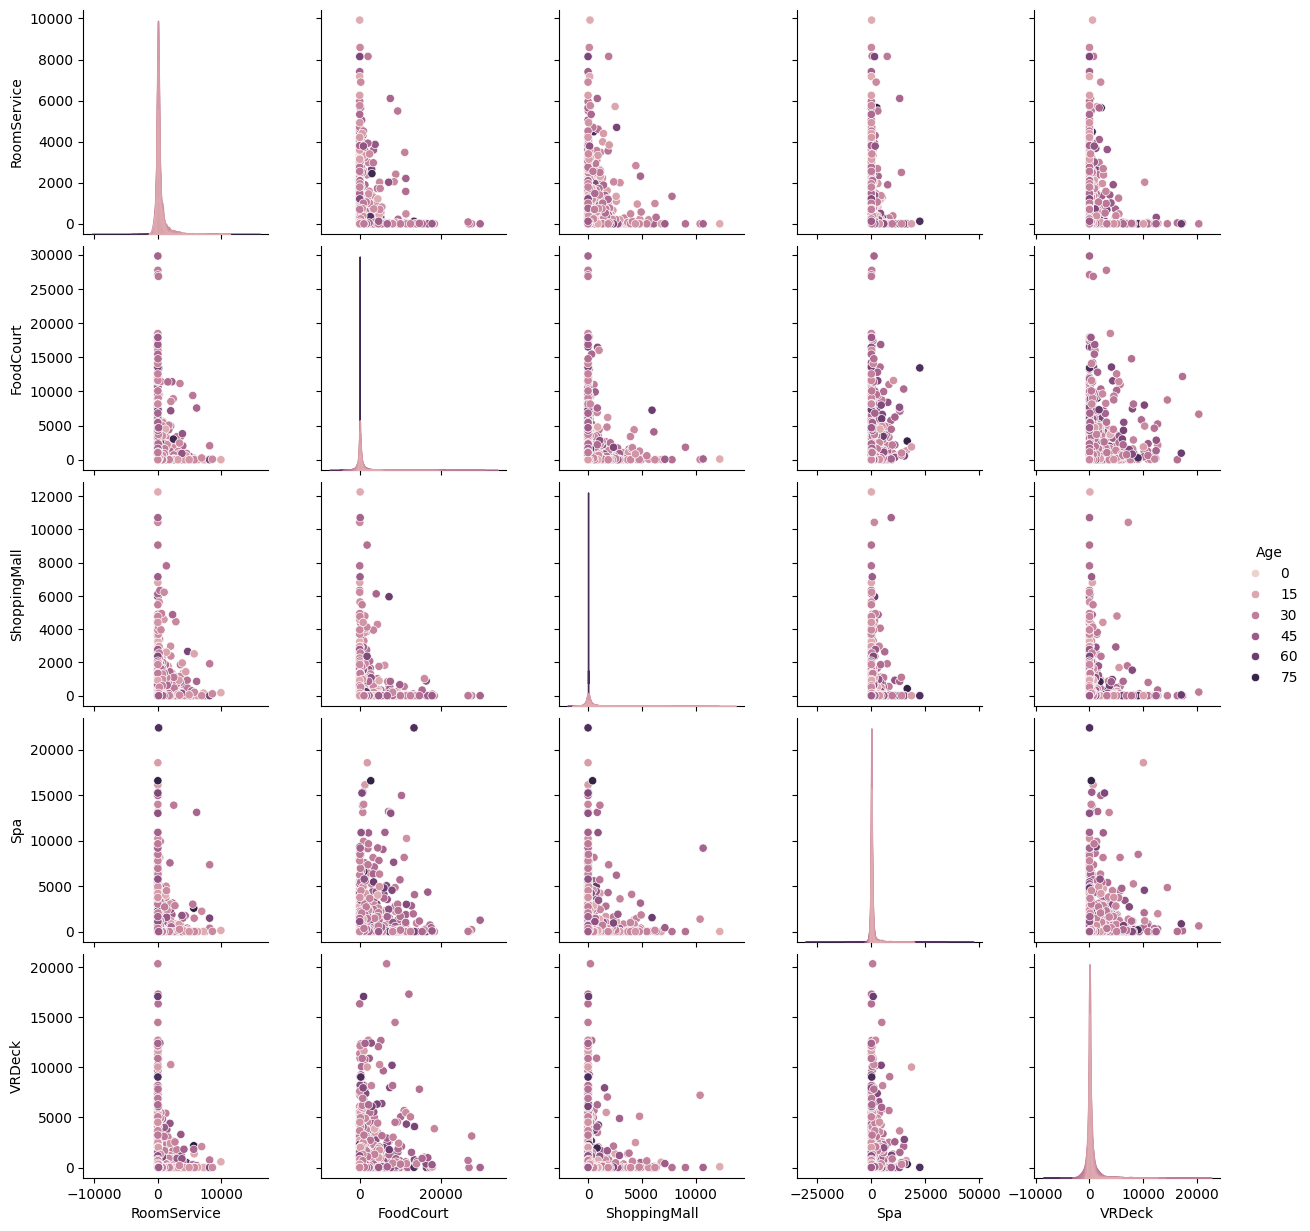

In [23]:
sns.pairplot(numerical_cleaned_spaceship, hue="Age")
plt.show()

**Train Test Split**

Now that we have split the data into **features** and **target** variables and imported the **train_test_split** function, split X and y into X_train, X_test, y_train, and y_test. 80% of the data should be in the training set and 20% in the test set.

In [33]:
#your code here
X_train, X_test, y_train, y_test  = train_test_split(X,y, test_size = 0.1)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [34]:
pred = knn.predict(X_test)
pred

array([27.,  7., 14., 18.,  7.,  7., 13.,  7., 21., 20., 26., 31., 23.,
       20., 15., 21., 28., 21., 15., 18.,  7., 20.,  7., 29.,  7.,  7.,
       15., 16.,  7., 13.,  7., 19.,  7.,  7., 19.,  7.,  7.,  7.,  7.,
       16.,  7., 26.,  7., 13.,  7.,  7.,  7.,  7., 39.,  7., 16.,  7.,
        7.,  7., 21.,  7.,  7., 19., 23., 21., 39.,  7., 18., 23., 16.,
        7., 31., 20., 13., 31., 18., 46., 17.,  7.,  7.,  7., 16.,  7.,
        7., 20., 21.,  7., 38., 36., 22.,  7., 20., 35., 25., 27., 15.,
       36., 22., 22.,  7., 18.,  7., 13., 23., 16.,  7., 18., 25.,  7.,
        7.,  7., 17.,  7., 18., 25., 26., 20.,  7., 22., 17.,  7.,  7.,
       19.,  7., 28., 19.,  7., 19., 19., 21., 20., 23., 20., 13., 14.,
       18., 26., 19.,  7.,  7.,  7.,  7., 13.,  7.,  7., 20., 24.,  7.,
       20., 39.,  7., 25., 36., 27., 32., 13.,  7.,  7., 28., 35., 20.,
       21.,  7., 31., 26.,  7.,  7., 18., 18., 26.,  7.,  7.,  7.,  7.,
       21., 14., 23., 32.,  7., 18.,  7., 15.,  7., 13., 18.,  7

**Model Selection**

In this exercise we will be using **KNN** as our predictive model.

You need to choose between **Classificator** or **Regressor**. Take into consideration target variable to decide.

Initialize a KNN instance without setting any hyperparameter.

In [35]:
#your code here
knn = KNeighborsClassifier()

Fit the model to your data.

In [36]:
#your code here
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)


Evaluate your model.

In [37]:
#your code here
accuracy = knn.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.03479576399394856


**Congratulations, you have just developed your first Machine Learning model!**